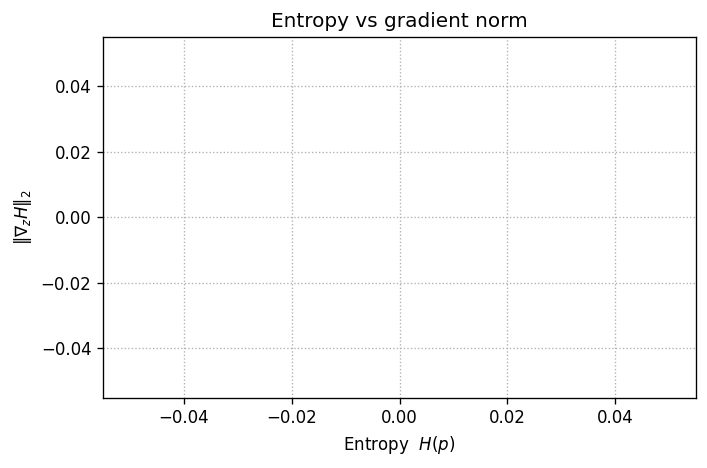

In [18]:
import torch, numpy as np, matplotlib.pyplot as plt
torch.manual_seed(0)

D              = 40
SAMPLES_PER    = 100        # 10 buckets × 100 = 1 000
BUCKETS        = 10
scales         = torch.linspace(6.0, 0.6, BUCKETS)   # low-entropy … high-entropy

entropy_vals, grad_vals = [], []

for s in scales:
    # ---- leaf logits for this bucket ---------------------------------
    z = (s * torch.randn(SAMPLES_PER, D, dtype=torch.float64)).requires_grad_()

    p = torch.softmax(z, dim=1)
    H = -(p * torch.log(p)).sum(dim=1)          # entropy per sample

    for i in range(SAMPLES_PER):
        z.grad = None
        H[i].backward(retain_graph=True)
        entropy_vals.append(H[i].item())
        grad_vals.append(z.grad[i].norm().item())

# ---- sort & plot ------------------------------------------------------
entropy_vals = np.array(entropy_vals)
grad_vals    = np.array(grad_vals)

order = np.argsort(entropy_vals)
plt.figure(figsize=(6,4))
plt.scatter(entropy_vals[order], grad_vals[order], s=8, alpha=0.4)
plt.xlabel("Entropy  $H(p)$")
plt.ylabel(r"$\|\nabla_{z} H\|_2$")
plt.title("Entropy vs gradient norm")
plt.grid(ls=":")
plt.tight_layout()
plt.show()


In [22]:
torch.max(p)

tensor(0.9997, grad_fn=<MaxBackward1>)